RandomForestRegressor(n_jobs=-1, random_state=50)

r2 score value:
0.6205965086332589

mean squared error:
0.13088812238263428

mean absolute error:
0.1029970767055471



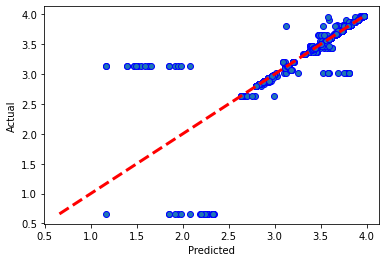

program runtime: 00:00:01


In [6]:
import sys
import time
import os
os.system("cls")

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import matplotlib.pyplot as plt        
import seaborn as sns
from pathlib import Path
#import pandas_profiling as pp

def get_program_running(start_time):
    end_time = time.clock()
    diff_time = end_time - start_time
    result = time.strftime("%H:%M:%S", time.gmtime(diff_time)) 
    print("program runtime: {}".format(result))

def main():
    # load df_student
    #csv_directory_file_input = os.path.join(Path(__file__).parent.parent, "csv")            
    #csv_path_file = "encoded_data_updated.csv"
    #csv_directory_path_file = os.path.join(csv_directory_file_input, csv_path_file)    
    df_student = pd.read_csv('encoded_data_updated.csv')
    # print(df_student.info())

    # df_student = df_student.hours_attempted.astype("float64")
    df_student["hours_attempted"] = pd.to_numeric(df_student["hours_attempted"], errors='coerce')
    df_student = df_student.astype("float64")
    # print(df_student.info())

    df_student = df_student.dropna(axis=0, how="any")

    # total empty values (missing) by columns:"
    # result = df_student.apply(lambda x: sum(x.isnull()), axis=0) 
    # print("Total empty values (missing) by columns:")
    # print(result)
    # print()
    # exit()

    # # define data_stats_report.html path and generate the report
    # html_directory_file_input = os.path.join(Path(__file__).parent.parent, "html")   
    # html_file_path = "data_stats_report.html"
    # html_directory_path_file = os.path.join(html_directory_file_input, html_file_path)     
    # # generate data_stats_report.html file
    # profile = pp.ProfileReport(df_student)  
    # profile.to_file(output_file=html_directory_path_file)
    # print("The data stats report file had been created successfully:")
    # exit()

    X = df_student.drop(labels="career_gpa", axis=1)
    # print("X: Features (DataFrame)")
    # print(X)
    # print()    

    y = df_student["career_gpa"]
    # print("y: Label (Series)")
    # print(y)

    # print()   

    # data split (20% test and 80% train)
    test_size = 0.2
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)

#     data standard scaling
    scaler = StandardScaler()    
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    # y_train = scaler.transform(y_train)
    X_test = scaler.transform(X_test)

    model_regressor= RandomForestRegressor(n_jobs=-1, random_state=50)
    # model_regressor = SVR(kernel = "poly")
    print(model_regressor)
    print()

    model_regressor.fit(X_train, y_train)

    y_predicted = model_regressor.predict(X_test)

    # R2 can take values from 0 to 1. A value of 1 indicates that the regression predictions perfectly fit the data. 
    r2_score_value = r2_score(y_test, y_predicted)
    print("r2 score value:")
    print(r2_score_value)
    print()

    # small MSE suggests the model is great at prediction
    mean_squared_error_result = mean_squared_error(y_test, y_predicted)
    # mean_squared_error_result = np.sqrt(mean_squared_error_result)
    print("mean squared error:")
    print(mean_squared_error_result)
    print()

    # small MAE suggests the model is great at prediction
    mean_absolute_error_result = mean_absolute_error(y_test, y_predicted)
    print("mean absolute error:")
    print(mean_absolute_error_result)
    print()

    # X_grid = np.arange(min(X), max(X), 0.01) #this step required because data is feature scaled.
    # X_grid = X_grid.reshape((len(X_grid), 1))
    # plt.scatter(X, y, color = 'red')
    # plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
    # plt.title('Truth or Bluff (SVR)')
    # plt.xlabel('Position level')
    # plt.ylabel('Salary')
    # plt.show()

    fig, ax = plt.subplots()
    ax.scatter(y_predicted, y_test, edgecolors=(0, 0, 1))
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    plt.show()

if __name__ == '__main__':
    start_time = time.clock()
    main()
    get_program_running(start_time)